<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_5/cnn_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
# import
import pandas as pd
import numpy as np

from google.colab import drive

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LeakyReLU, BatchNormalization, Reshape, Activation, UpSampling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# load data sets from Google Drive
drive.mount('/d')
train_data_path = '/d/My Drive/Colab Notebooks/DL-tutorial/data/brain/train'
test_data_path = '/d/My Drive/Colab Notebooks/DL-tutorial/data/brain/test'

Drive already mounted at /d; to attempt to forcibly remount, call drive.mount("/d", force_remount=True).


#Data Augmentation
 - https://www.datacamp.com/tutorial/complete-guide-data-augmentation

## ImageDataGenerator
 - is augmented data added? : No.
 https://stackoverflow.com/questions/51748514/does-imagedatagenerator-add-more-images-to-my-dataset
 - flow_from_directory : yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

In [3]:
"""
generating image data
"""

# data generated with augmented option
train_data_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
train_data = train_data_generator.flow_from_directory(directory=train_data_path, target_size=(150, 150), batch_size=5, class_mode='binary') # class_moce='binary': normal, abnormal binary selection

test_data_generator = ImageDataGenerator(rescale=1./255) # augmentation is not used in test data sets
test_data = test_data_generator.flow_from_directory(directory=test_data_path, target_size=(150, 150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [4]:
"""
modeling CNN for image classification
"""

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [5]:
"""
checkpointers
"""
early_stopping_checkpointer = EarlyStopping(patience=5) # monitor 'val_loss' for default.

In [6]:
"""
training
"""
history = model.fit(train_data, epochs=100, validation_data=test_data, validation_steps=10, callbacks=[early_stopping_checkpointer])

Epoch 1/100
32/32 [==============================] - 6s 46ms/step - loss: 0.7066 - accuracy: 0.5125 - val_loss: 0.7035 - val_accuracy: 0.4400
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 0.7052 - accuracy: 0.4688 - val_loss: 0.6845 - val_accuracy: 0.5400
Epoch 3/100
32/32 [==============================] - 1s 42ms/step - loss: 0.6891 - accuracy: 0.5688 - val_loss: 0.6787 - val_accuracy: 0.6800
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.6762 - accuracy: 0.5750 - val_loss: 0.6551 - val_accuracy: 0.7800
Epoch 5/100
32/32 [==============================] - 2s 62ms/step - loss: 0.6406 - accuracy: 0.6750 - val_loss: 0.6353 - val_accuracy: 0.6000
Epoch 6/100
32/32 [==============================] - 3s 91ms/step - loss: 0.6130 - accuracy: 0.6562 - val_loss: 0.6282 - val_accuracy: 0.5800
Epoch 7/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5770 - accuracy: 0.7375 - val_loss: 0.4517 - val_accuracy: 0.8600
Epoch 

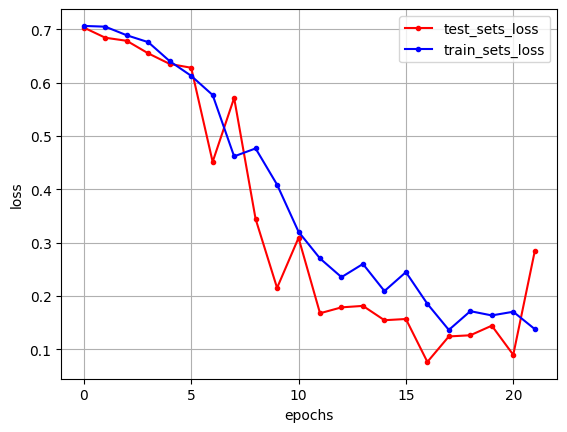

In [7]:
# show result on graph
val_loss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss)) # 24 -> [0 1 2 3 ... 21 22 23]

plt.plot(x_len, val_loss, marker='.', c='red', label='test_sets_loss')
plt.plot(x_len, loss, marker='.', c='blue', label='train_sets_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#fit.validation_step
If 'validation_steps' is specified and only part of the dataset will be consumed, the evaluation will start from the beginning of the dataset at each epoch. This ensures that the same validation samples are used every time.